# Getting Python


For this course, we are going to use Jupyter notebook as our environment for developing Python code.
refer to https://jupyter.readthedocs.io/en/latest/content-quickstart.html on the instructions how to install it, the easiest way is to install from Anaconda (https://www.anaconda.com/download/) website, make sure you install (Version 4.4.0, Release Date: May 31, 2017) with Python 3.6.

Also, it is good for the students who are not familiar with python (or they need a quick refreshment) to follow Jim Bagrow tutorial http://bagrow.com/ds1/whirlwindtourpython/00-Title.html. 

All the assignments to be written in Python 3.6 and can be run using Jupyter on one of the following Internet browsers (Chrome, Safari or Firefox), these are the browsers that officially supported by jupyter.

<u> Note: for this assignment, submit your local copy of this page, running on IPython. Submit the file to Blackboard under Assignment1 using this file format:</u> <b>Yourfirstname_lastname_Assignment4.ipynb</b> 

#### <b>Deadline</b>: <u>Monday, Dec-04-2017 11:59 PM.</u>

## Assignment 4

In assignment 4 use tensor flow to build and train neural network architectures in part1 and part2.
Hint: Refer to the MLP.ipynb from the shared documents on the black borad as an example to build and train a neural network using tensor flow from scratch.
  

#### Part 1
In this part you are going to train a neural network on notMNIST dataset. The notMNIST dataset is a image recognition dataset of font glypyhs for the letters A through J useful with simple neural networks. It is quite similar to the classic MNIST dataset of handwritten digits 0 through 9. to make easy for you. the code below will load the notMNIST dataset into train, validation and testing arrays to use them during the training of the network.  
you need to download notMNIST.data from this link ...

https://drive.google.com/file/d/1ablp83xroWod-Mfr0dGlVM49YXNm32l7/view?usp=sharing

In [1]:
from six.moves import cPickle as loader
from six.moves import range

data_file = 'notMNIST.data'

with open(data_file, 'rb') as f:
    data = loader.load(f)
    train_dataset = data['train_dataset']
    train_labels = data['train_labels']
    valid_dataset = data['valid_dataset']
    valid_labels = data['valid_labels']
    test_dataset = data['test_dataset']
    test_labels = data['test_labels']
    del data 

    print('Training set', train_dataset.shape, train_labels.shape)
    print('Validation set', valid_dataset.shape, valid_labels.shape)
    print('Test set', test_dataset.shape, test_labels.shape)

Training set (200000, 28, 28) (200000,)
Validation set (10000, 28, 28) (10000,)
Test set (10000, 28, 28) (10000,)


In [29]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OneHotEncoder
import math

a. Convince yourself about the data by showing few  images and printing the size of train/test/validation data arrays.[10 points]

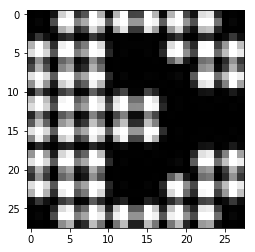

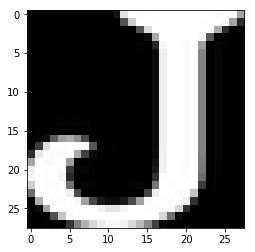

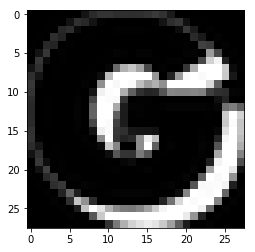

Training set (200000, 28, 28) (200000,)
Validation set (10000, 28, 28) (10000,)
Test set (10000, 28, 28) (10000,)


In [3]:
for i in range(3):
    z=train_dataset[i]
    # Plot the grid
    plt.imshow(z)
    plt.gray()
    plt.show()

print('Training set', train_dataset.shape, train_labels.shape)
print('Validation set', valid_dataset.shape, valid_labels.shape)
print('Test set', test_dataset.shape, test_labels.shape)

b.  Reformat data to shape that's make it easy to train neural network models:
-	 Reshape the data to a flat matrix.[5 points]. Hint: For example convert training dataset to have (200000, 784) shape, do the same for the rest of the arrays.
-	 Reformat the output to 1-hot encodings. [5 points]


In [4]:
def flat_convert_2to1(dataset,length = 784):
    converted_dataset = []
    for img in dataset:
        converted_dataset.append(img.reshape(length))
    converted_dataset= np.array(converted_dataset)
    return converted_dataset

In [5]:
converted_train_dataset = flat_convert_2to1(train_dataset)
converted_valid_dataset = flat_convert_2to1(valid_dataset)
converted_test_dataset = flat_convert_2to1(test_dataset)

print('Training set', converted_train_dataset.shape)
print('Validation set', converted_valid_dataset.shape)
print('Test set', converted_test_dataset.shape)

Training set (200000, 784)
Validation set (10000, 784)
Test set (10000, 784)


In [6]:
enc = OneHotEncoder()
train_onehot_output = enc.fit_transform(train_labels.reshape(len(train_labels),1)).toarray()
valid_onehot_output = enc.fit_transform(valid_labels.reshape(len(valid_labels),1)).toarray()
test_onehot_output = enc.fit_transform(test_labels.reshape(len(test_labels),1)).toarray()

print('Training set', train_onehot_output.shape)
print('Validation set', valid_onehot_output.shape)
print('Test set', test_onehot_output.shape)

Training set (200000, 10)
Validation set (10000, 10)
Test set (10000, 10)


c. Refer to the neural network lecture to answer the following questions (no need to code or to show experimental results for this question) [15 points]:
- the best activation function.
- the best initialization.
- Best gradient descent update learning rule. 
    

## Answer for part1.c :

- **the best activation function**:  
    The leaky relu activation fucntion
- **the best initialization**:    
    xavier initialization
- **Best gradient descent update learning rule**:    
    AdamOptimize

d. Train a multi-layer neural network of one hidden layer neural network using the best: activation, initialization and gradient descent learning rule that you found in the previous question. 
Train for 15 epochs with a  batch size of 128 and pick the model that has less validation error and report the testing error for that model. Use the accuracy metric to measure the performance. [35 points]


In [9]:
# define the network toplogies, two hidden neural network with input diminsion of 784 
# and output diminsion of 10

n_hidden_1 = 256 
n_input    = 784 
n_classes  = 10  

# placeholder for input and output, None: means it could be of any diminsion
x = tf.placeholder("float", [None, n_input], name = 'x')
y = tf.placeholder("float", [None, n_classes], name = 'y')
phase = tf.placeholder(tf.bool, name='phase')

initializer = tf.contrib.layers.xavier_initializer()

# network parameters 
stddev = 0.1
weights = {
    'h1': tf.Variable(initializer((n_input,n_hidden_1))),
    'out': tf.Variable(initializer((n_hidden_1,n_classes)))
}
biases = {
    'b1': tf.Variable(initializer([n_hidden_1])),
    'out': tf.Variable(initializer([n_classes]))
}
print ("network is ready ...")


network is ready ...


In [10]:
def multilayer_perceptron(_X, _weights, _biases):
    layer_1 = tf.nn.leaky_relu(tf.add(tf.matmul(_X, _weights['h1']), _biases['b1'])) 
    return (tf.matmul(layer_1, _weights['out']) + _biases['out'])

In [11]:
# build the network graph
pred = multilayer_perceptron(x, weights, biases)

# use softmax cross entropy as the loss(cost) function
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = pred, labels=y)) 
# define optimizer
optm = tf.train.AdamOptimizer().minimize(cost)
# measuring the accuracy
corr = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
accr = tf.reduce_mean(tf.cast(corr, "float"))

# initilize all the graph parameters.
init = tf.global_variables_initializer()
print ("ready to go ...")

ready to go ...


In [12]:
def train_MLP(save_path = "/tmp_model/best_model.ckpt"):
    # Training params
    training_epochs = 15
    batch_size      = 128 # use mini-batch, we will disucss this next lecture
    display_step    = 3 # display results every 4 epochs

    #create the saver to save the best model.
    saver = tf.train.Saver()
    # launch the graph using Session()
    sess = tf.Session()
    # run with the initiales
    sess.run(init)

    # optimization code, we used here stochastic gradient descent SGD.
    best_vaild_accs = 0
    for epoch in range(training_epochs):
        sample_num = len(converted_train_dataset)
        avg_cost = 0.
        total_batch = int(sample_num/batch_size)
        # iterate
        for i in range(total_batch):
            start = i*batch_size
            end = i*batch_size + batch_size-1
            batch_xs, batch_ys = converted_train_dataset[start:end]\
                                , train_onehot_output[start:end]
            feeds = {x: batch_xs, y: batch_ys}
            sess.run(optm, feed_dict=feeds)
            avg_cost += sess.run(cost, feed_dict=feeds) # to calculate the cost, you can skip
        avg_cost = avg_cost / total_batch

        #save the best neural network
        feeds = {x: batch_xs, y: batch_ys}
        train_acc = sess.run(accr, feed_dict=feeds)
        feeds = {x: converted_valid_dataset, y: valid_onehot_output}
        valid_acc = sess.run(accr, feed_dict=feeds)
        if(valid_acc > best_vaild_accs): 
            best_vaild_accs = valid_acc
            saver.save(sess,save_path)
        # display
        if (epoch+1) % display_step == 0:
            print ("Epoch: %03d/%03d cost: %.9f" % (epoch+1, training_epochs, avg_cost))
            print ("Train Accuracy: %.3f" % (train_acc))
            print ("Valid Accuracy: %.3f" % (valid_acc))    

    #get the best neural network
    saver.restore(sess, save_path)
    print ("\nThe best valid Accuracy: %.3f" % (best_vaild_accs)) 
    feeds = {x: converted_test_dataset, y: test_onehot_output}
    test_acc = sess.run(accr, feed_dict=feeds)   
    print ("Test Accuracy: %.3f" % (test_acc))
    print ("Test error: %.3f" % (1 - test_acc))
    print ("optimization finished")
    sess.close()

In [13]:
train_MLP()

Epoch: 003/015 cost: 0.358490747
Train Accuracy: 0.850
Valid Accuracy: 0.880
Epoch: 006/015 cost: 0.298352629
Train Accuracy: 0.882
Valid Accuracy: 0.886
Epoch: 009/015 cost: 0.261446621
Train Accuracy: 0.898
Valid Accuracy: 0.889
Epoch: 012/015 cost: 0.233463887
Train Accuracy: 0.913
Valid Accuracy: 0.890
Epoch: 015/015 cost: 0.210546389
Train Accuracy: 0.937
Valid Accuracy: 0.889

The best valid Accuracy: 0.890
Test Accuracy: 0.945
Test error: 0.055
optimization finished


e. (This part for graduate students only) Which regularization method is the best to use, L2, dropout or Batch Normalization (justify your answer experimentally). does the batch normalization help in converging the network faster ? [30 points]


#### Answer:
** As shown below, I think the dropout is the best regularzion method**

### L2

In [14]:
#L2

# Original cost function
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = pred, labels=y)) 
# add l2 regulazation
beta = 0.01
regularizer = tf.nn.l2_loss(weights['h1']) + tf.nn.l2_loss(weights['out'])
cost = tf.reduce_mean(cost + beta * regularizer)
optm = tf.train.AdamOptimizer().minimize(cost)
init = tf.global_variables_initializer()

In [15]:
train_MLP()

Epoch: 003/015 cost: 0.728255881
Train Accuracy: 0.819
Valid Accuracy: 0.830
Epoch: 006/015 cost: 0.719555619
Train Accuracy: 0.819
Valid Accuracy: 0.830
Epoch: 009/015 cost: 0.716368231
Train Accuracy: 0.819
Valid Accuracy: 0.834
Epoch: 012/015 cost: 0.714818664
Train Accuracy: 0.827
Valid Accuracy: 0.835
Epoch: 015/015 cost: 0.713945810
Train Accuracy: 0.819
Valid Accuracy: 0.835

The best valid Accuracy: 0.835
Test Accuracy: 0.901
Test error: 0.099
optimization finished


### Dropout

In [16]:
#dropout
# prepare the graph
keep_prob = tf.placeholder("float")
save_path = "/tmp_model/best_model.ckpt"
def multilayer_perceptron_dropout(_X, _weights, _biases):
    layer_1 = tf.nn.leaky_relu(tf.add(tf.matmul(_X, _weights['h1']), _biases['b1'])) 
    drop_out = tf.nn.dropout(layer_1, keep_prob)
    return (tf.matmul(layer_1, _weights['out']) + _biases['out'])

# build the network graph
pred_drop_out = multilayer_perceptron_dropout(x, weights, biases)

# use softmax cross entropy as the loss(cost) function
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = pred_drop_out, labels=y)) 

corr = tf.equal(tf.argmax(pred_drop_out, 1), tf.argmax(y, 1))
accr = tf.reduce_mean(tf.cast(corr, "float"))
# define optimizer
optm = tf.train.AdamOptimizer().minimize(cost)

# initilize all the graph parameters.
init = tf.global_variables_initializer()
print ("ready to go ...")

ready to go ...


In [17]:
# Training params
training_epochs = 15
batch_size      = 128 # use mini-batch, we will disucss this next lecture
display_step    = 3 # display results every 4 epochs

#create the saver to save the best model.
saver = tf.train.Saver()
# launch the graph using Session()
sess = tf.Session()
# run with the initiales
sess.run(init)

# optimization code, we used here stochastic gradient descent SGD.
best_vaild_accs = 0
for epoch in range(training_epochs):
    sample_num = len(converted_train_dataset)
    avg_cost = 0.
    total_batch = int(sample_num/batch_size)
    # iterate
    for i in range(total_batch):
        start = i*batch_size
        end = i*batch_size + batch_size-1
        batch_xs, batch_ys = converted_train_dataset[start:end]\
                            , train_onehot_output[start:end]
        feeds = {x: batch_xs, y: batch_ys, keep_prob : 0.5}
        sess.run(optm, feed_dict=feeds)
        avg_cost += sess.run(cost, feed_dict=feeds) # to calculate the cost, you can skip
    avg_cost = avg_cost / total_batch

    #save the best neural network
    feeds = {x: batch_xs, y: batch_ys, keep_prob : 0.5}
    train_acc = sess.run(accr, feed_dict=feeds)
    feeds = {x: converted_valid_dataset, y: valid_onehot_output, keep_prob : 1}
    valid_acc = sess.run(accr, feed_dict=feeds)
    if(valid_acc > best_vaild_accs): 
        best_vaild_accs = valid_acc
        saver.save(sess,save_path)
    # display
    if (epoch+1) % display_step == 0:
        print ("Epoch: %03d/%03d cost: %.9f" % (epoch+1, training_epochs, avg_cost))
        print ("Train Accuracy: %.3f" % (train_acc))
        print ("Valid Accuracy: %.3f" % (valid_acc))    

#get the best neurla network
saver.restore(sess, save_path)
print ("\nThe best valid Accuracy: %.3f" % (best_vaild_accs)) 
feeds = {x: converted_test_dataset, y: test_onehot_output, keep_prob : 1}
test_acc = sess.run(accr, feed_dict=feeds)   
print ("Test Accuracy: %.3f" % (test_acc))
print ("Test error: %.3f" % (1 - test_acc))

print ("optimization finished")
sess.close()

Epoch: 003/015 cost: 0.357939605
Train Accuracy: 0.850
Valid Accuracy: 0.880
Epoch: 006/015 cost: 0.299080095
Train Accuracy: 0.874
Valid Accuracy: 0.887
Epoch: 009/015 cost: 0.263168589
Train Accuracy: 0.898
Valid Accuracy: 0.888
Epoch: 012/015 cost: 0.235682250
Train Accuracy: 0.913
Valid Accuracy: 0.886
Epoch: 015/015 cost: 0.212868331
Train Accuracy: 0.921
Valid Accuracy: 0.886

The best valid Accuracy: 0.888
Test Accuracy: 0.947
Test error: 0.053
optimization finished


### Batch Normalization

In [18]:
# Batch
# prepare the graph
save_path = "/tmp_model/best_model.ckpt"

def multilayer_perceptron_batch_norm(_X, _weights, _biases, phase):
    layer_1 = tf.add(tf.matmul(_X, _weights['h1']), _biases['b1'])
    layer_1_batch = tf.nn.leaky_relu(tf.contrib.layers.batch_norm(layer_1, center=True, scale=True, is_training=phase)) 
    return (tf.matmul(layer_1_batch, _weights['out']) + _biases['out'])

# build the network graph
pred_drop_batch = multilayer_perceptron_batch_norm(x, weights, biases, phase)

# use softmax cross entropy as the loss(cost) function
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = pred_drop_batch, labels=y)) 

corr = tf.equal(tf.argmax(pred_drop_batch, 1), tf.argmax(y, 1))
accr = tf.reduce_mean(tf.cast(corr, "float"))
# define optimizer
optm = tf.train.AdamOptimizer().minimize(cost)

# initilize all the graph parameters.
init = tf.global_variables_initializer()
print ("ready to go ...")

ready to go ...


In [19]:
# Training params
training_epochs = 15
batch_size      = 128 # use mini-batch, we will disucss this next lecture
display_step    = 3 # display results every 4 epochs

#create the saver to save the best model.
saver = tf.train.Saver()
# launch the graph using Session()
sess = tf.Session()
# run with the initiales
sess.run(init)

# optimization code, we used here stochastic gradient descent SGD.
best_vaild_accs = 0
for epoch in range(training_epochs):
    sample_num = len(converted_train_dataset)
    avg_cost = 0.
    total_batch = int(sample_num/batch_size)
    # iterate
    for i in range(total_batch):
        start = i*batch_size
        end = i*batch_size + batch_size-1
        batch_xs, batch_ys = converted_train_dataset[start:end]\
                            , train_onehot_output[start:end]
        feeds = {x: batch_xs, y: batch_ys, phase : True}
        sess.run(optm, feed_dict=feeds)
        avg_cost += sess.run(cost, feed_dict=feeds) # to calculate the cost, you can skip
    avg_cost = avg_cost / total_batch

    #save the best neural network 
    # display
    if (epoch+1) % display_step == 0:
        print ("Epoch: %03d/%03d cost: %.9f" % (epoch+1, training_epochs, avg_cost))
        feeds = {x: batch_xs, y: batch_ys, phase : True}
        train_acc = sess.run(accr, feed_dict=feeds)
        print ("Train Accuracy: %.3f" % (train_acc))
        feeds = {x: converted_valid_dataset, y: valid_onehot_output, phase : False}
        valid_acc = sess.run(accr, feed_dict=feeds)
        print ("Valid Accuracy: %.3f" % (valid_acc))    
        if(valid_acc > best_vaild_accs): 
            best_vaild_accs = valid_acc
            saver.save(sess,save_path)

#get the best neural network
saver.restore(sess, save_path)
print ("\nThe best valid Accuracy: %.3f" % (best_vaild_accs)) 
feeds = {x: converted_test_dataset, y: test_onehot_output, phase : False}
test_acc = sess.run(accr, feed_dict=feeds)   
print ("Test Accuracy: %.3f" % (test_acc))
print ("Test error: %.3f" % (1 - test_acc))

print ("optimization finished")
sess.close()

Epoch: 003/015 cost: 0.370271618
Train Accuracy: 0.843
Valid Accuracy: 0.803
Epoch: 006/015 cost: 0.307809553
Train Accuracy: 0.874
Valid Accuracy: 0.783
Epoch: 009/015 cost: 0.269975222
Train Accuracy: 0.906
Valid Accuracy: 0.770
Epoch: 012/015 cost: 0.241041594
Train Accuracy: 0.913
Valid Accuracy: 0.763
Epoch: 015/015 cost: 0.217135365
Train Accuracy: 0.913
Valid Accuracy: 0.764

The best valid Accuracy: 0.803
Test Accuracy: 0.871
Test error: 0.129
optimization finished


## Part 2

(This whole part is for graduate students only) In this part you are going to train a convolutional neural network on notMNIST dataset, refer to part1 to use same training, validation and testing datasets. 

Start by reading the Deep MNIST for Experts tutorial on the tensorflow website (https://www.tensorflow.org/get_started/mnist/pros). 
Go through the examples provided in this tutorial. 


in here we are going to build a different network. It’d be helpful to quickly go through the examples provided in the tutorial.


a. Define the model as indicated in the code below. The model is defined as follows:

- An input that is 728 dimensional vector.
- Reshape the input as 28x28x1 images (only 1 because they are grey scale)
- A convolutional layer with 25 filters of shape 12x12x1 and a ReLU non-linearity (with stride (2, 2) and no padding)
- A convolutional layer with 64 filters of shape 5x5x25 and a ReLU non-linearity (with stride (1, 2) and padding to maintain size)
- A max_pooling layer of shape 2x2
- A fully connected layer taking all the outputs of the max_pooling layer to 1024 units and ReLU nonlinearity
- A fully connected layer taking 1024 units to 10 no activation function (the softmax non-linearity will be included in the loss function rather than in the model) [15 points]

Hint: start from known architecture then modify the code to match the numbers listed above, you might need to have flat layer that flatten max pool layer data.

In [20]:
def conv2d(x, W, strides = [1, 2, 2, 1], padding='SAME'):
    """conv2d returns a 2d convolution layer with full stride."""
    return tf.nn.conv2d(x, W, strides, padding)


def max_pool_2x2(x):
    """max_pool_2x2 downsamples a feature map by 2X."""
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
                        strides=[1, 2, 2, 1], padding='SAME')

def weight_variable(shape):
    """weight_variable generates a weight variable of a given shape."""
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)


def bias_variable(shape):
    """bias_variable generates a bias variable of a given shape."""
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)

In [21]:
def deepnn(x):
    """deepnn builds the graph for a deep net for classifying digits.
    Args:
    x: an input tensor with the dimensions (N_examples, 784), where 784 is the
    number of pixels in a standard MNIST image.
    Returns:
    A tuple (y, keep_prob). y is a tensor of shape (N_examples, 10), with values
    equal to the logits of classifying the digit into one of 10 classes (the
    digits 0-9). keep_prob is a scalar placeholder for the probability of
    dropout.
    """
    # Reshape to use within a convolutional neural net.
    # Last dimension is for "features" - there is only one here, since images are
    # grayscale -- it would be 3 for an RGB image, 4 for RGBA, etc.
    with tf.name_scope('reshape'):
        x_image = tf.reshape(x, [-1, 28, 28, 1])
   # print("x_image", x_image.shape)
    # First convolutional layer - maps one grayscale image to  feature maps.
    with tf.name_scope('conv1'):
        W_conv1 = weight_variable([12, 12, 1, 25])
        b_conv1 = bias_variable([25])
        h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1,strides = [1,2,2,1], padding = 'VALID') + b_conv1)
    #print("h_conv1", h_conv1.shape)
    # Second convolutional layer -- maps 25 feature maps to 64.
    with tf.name_scope('conv2'):
        W_conv2 = weight_variable([5, 5, 25, 64])
        b_conv2 = bias_variable([64])
        h_conv2 = tf.nn.relu(conv2d(h_conv1, W_conv2,strides = [1,1,2,1], padding = 'SAME') + b_conv2)
    #print("h_conv2", h_conv2.shape)
    # Second pooling layer.
    with tf.name_scope('pool2'):
        h_pool2 = max_pool_2x2(h_conv2)
    #print("h_pool2", h_pool2.shape)
    # Fully connected layer 1 -- after 2 round of downsampling, our 28x28 image
    # is down to 5x3x64 feature maps -- maps this to 1024 features.
    with tf.name_scope('fc1'):
        W_fc1 = weight_variable([5 * 3 * 64, 1024])
        b_fc1 = bias_variable([1024])

        h_pool2_flat = tf.reshape(h_pool2, [-1, 5 * 3 * 64])
        h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)


    # Map the 1024 features to 10 classes, one for each digit
    with tf.name_scope('fc2'):
        W_fc2 = weight_variable([1024, 10])
        b_fc2 = bias_variable([10])

        y_conv = tf.matmul(h_fc1, W_fc2) + b_fc2
    return y_conv, W_conv1

b. write the code to train the model written in (a), train for 15 epochs with a  batch size of 128. 

Loss Function, Accuracy and Training Algorithm

- You will use the cross entropy loss function. The loss function is called tf.nn.cross_entropy_with_logits in tensorflow
- Accuray is simply defined as the fraction of data correctly classified
- For training you should use the AdamOptimizer (read the documentation) and initially pick the learning rate to be 0.05 (if this learning rate does not work, pick different learning rate) with decay step of 0.95 every 2000 iterations as showen in the code below. You are encouraged, to experiment with other optimisation procedures and learning rates. [25 points]
    

In [26]:
# and output diminsion of 10

n_input    = 784 
n_classes  = 10  

# placeholder for input and output, None: means it could be of any diminsion
x = tf.placeholder("float", [None, n_input])
y = tf.placeholder("float", [None, n_classes])

y_conv, W_conv= deepnn(x)

# We'll use the cross entropy loss function 
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = y_conv, labels= y))

# And classification accuracy
correct_prediction = tf.equal(tf.argmax(y_conv, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# And the Adam optimiser
global_step = tf.Variable(0)
learning_rate = tf.train.exponential_decay(0.05, global_step, 2000, 0.95)
optimizer = tf.train.AdagradOptimizer(learning_rate).minimize(cross_entropy, global_step=global_step)

In [28]:
 # Start a tf session and run the optimisation algorithm
sess = tf.Session()
sess.run(tf.initialize_all_variables())
save_path = "/tmp_model/best_model.ckpt"
# use 
#TODO
# Write the optimisation code here
training_epochs = 15
batch_size      = 128 # use mini-batch, we will disucss this next lecture
display_step    = 3 # display results every 4 epochs


#create the saver to save the best model.
saver = tf.train.Saver()

# optimization code, we used here stochastic gradient descent SGD.
best_vaild_accs = 0
for epoch in range(training_epochs):
    sample_num = len(converted_train_dataset)
    avg_cost = 0.
    total_batch = int(sample_num/batch_size)
    # iterate
    for i in range(total_batch):
        start = i*batch_size
        end = i*batch_size + batch_size-1
        batch_xs, batch_ys = converted_train_dataset[start:end]\
                            , train_onehot_output[start:end]
        feeds = {x: batch_xs, y: batch_ys}
        sess.run(optimizer, feed_dict=feeds)
        avg_cost += sess.run(cross_entropy, feed_dict=feeds) # to calculate the cost, you can skip
    avg_cost = avg_cost / total_batch

    #save the best neural network
    feeds = {x: batch_xs, y: batch_ys}
    train_acc = sess.run(accuracy, feed_dict=feeds)
    feeds = {x: converted_valid_dataset, y: valid_onehot_output}
    valid_acc = sess.run(accuracy, feed_dict=feeds)
    if(valid_acc > best_vaild_accs): 
        best_vaild_accs = valid_acc
        saver.save(sess,save_path)
    # display
    if (epoch+1) % display_step == 0:
        print ("Epoch: %03d/%03d cost: %.9f" % (epoch+1, training_epochs, avg_cost))
        print ("Train Accuracy: %.3f" % (train_acc))
        print ("Valid Accuracy: %.3f" % (valid_acc))    

#get the best neural network
saver.restore(sess, save_path)
print ("\nThe best valid Accuracy: %.3f" % (best_vaild_accs)) 
feeds = {x: converted_test_dataset, y: test_onehot_output}
test_acc = sess.run(accuracy, feed_dict=feeds)   
print ("Test Accuracy: %.3f" % (test_acc))
print ("Test error: %.3f" % (1 - test_acc))
print ("optimization finished")
sess.close()

Instructions for updating:
Use `tf.global_variables_initializer` instead.
Epoch: 003/015 cost: 0.242161549
Train Accuracy: 0.898
Valid Accuracy: 0.894
Epoch: 006/015 cost: 0.178617277
Train Accuracy: 0.945
Valid Accuracy: 0.902
Epoch: 009/015 cost: 0.137836489
Train Accuracy: 0.953
Valid Accuracy: 0.904
Epoch: 012/015 cost: 0.108114066
Train Accuracy: 0.953
Valid Accuracy: 0.906
Epoch: 015/015 cost: 0.085890086
Train Accuracy: 0.961
Valid Accuracy: 0.908

The best valid Accuracy: 0.908
Test Accuracy: 0.961
Test error: 0.039
optimization finished


c. [Extra credits] Find better convolutional neural network architecture that give better results (at least enhancment of 3.0%) than the one built in part b (prove experimentally). [15 points]

d. [Extra credits] Visualize all the 32 filters in the first convolution layer. Each of shape 12x12x1, they might be viewed as greyscale images. [15 points]

In [44]:
initialization = tf.initialize_all_variables()
#strat section
sess = tf.Session()
sess.run(initialization)

# Retrieve the values of the  first convolution weights from TensorFlow.
weights = sess.run(W_conv)
print(weights.shape)
input_channel=0

(12, 12, 1, 25)


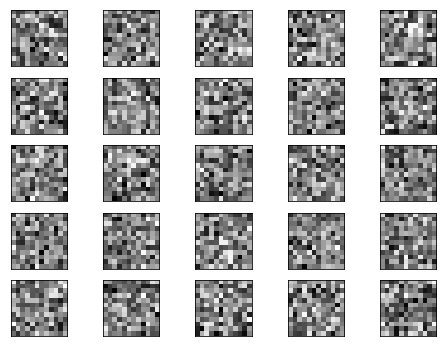

In [47]:

# Get the lowest and highest values for the weights.
w_min = np.min(weights)
w_max = np.max(weights)

#get number of filters used in the conv. layer.
num_filters = weights.shape[3]

# Number of grids to plot.
num_grids = math.ceil(math.sqrt(num_filters))


fig, axes = plt.subplots(num_grids, num_grids)
fig.set_size_inches(8, 6)

for i, ax in enumerate(axes.flat):
    
    if i<num_filters:        
        image = weights[:, :, input_channel, i]
        ax.imshow(image, vmin=w_min, vmax=w_max,
                  interpolation='nearest', cmap='gray')

    ax.set_xticks([])
    ax.set_yticks([])

plt.show()